In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

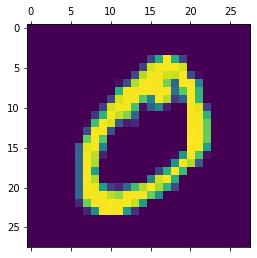

In [9]:
plt.matshow(x_train[1])

In [10]:
y_train[1]

0

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train_flatted=x_train.reshape(len(x_train),28*28)
x_train_flatted.shape

(60000, 784)

In [14]:
x_test_flatted=x_test.reshape(len(x_test),28*28)
x_test_flatted.shape

(10000, 784)

In [15]:
x_train_flatted[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
model=keras.Sequential([
                        keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train_flatted,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4667 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9256


In [21]:
model.evaluate(x_test_flatted,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.9246


[0.266345739364624, 0.9246000051498413]

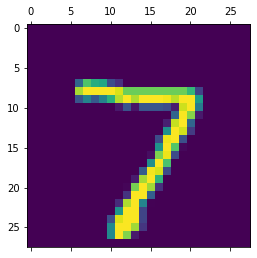

In [24]:
plt.matshow(x_test[0])

In [25]:
y_predict=model.predict(x_test_flatted)
y_predict[0]

array([1.9771159e-02, 3.1825709e-07, 7.7294469e-02, 9.6232462e-01,
       2.3252070e-03, 8.3053768e-02, 1.9132231e-06, 9.9974537e-01,
       1.0387647e-01, 5.9096098e-01], dtype=float32)

In [26]:
np.argmax(y_predict[0])

7

In [27]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,    9,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    8,  932,   14,    7,    2,   12,   11,   39,    3],
       [   2,    0,   21,  929,    0,   16,    2,   12,   23,    5],
       [   2,    1,    6,    1,  908,    0,   11,    5,   11,   37],
       [   8,    3,    5,   47,   11,  744,   17,    8,   42,    7],
       [  11,    3,    9,    1,    7,    7,  914,    2,    4,    0],
       [   1,    5,   22,    5,    7,    0,    0,  956,    4,   28],
       [   5,    7,    6,   23,    9,   15,    9,   12,  882,    6],
       [   9,    5,    1,   13,   25,    3,    0,   28,   14,  911]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

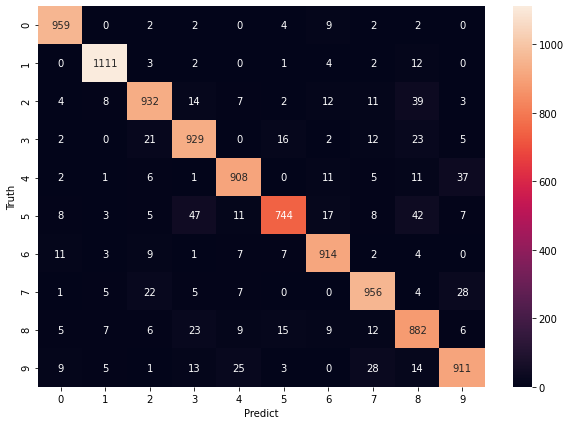

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predict")
plt.ylabel("Truth")


In [41]:
model=keras.Sequential([
                        keras.layers.Dense(100,input_shape=(784,),activation="relu"),
                        keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train_flatted,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1214 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0502 - accuracy: 0.9850


313/313 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9763


Text(69.0, 0.5, 'Truth')

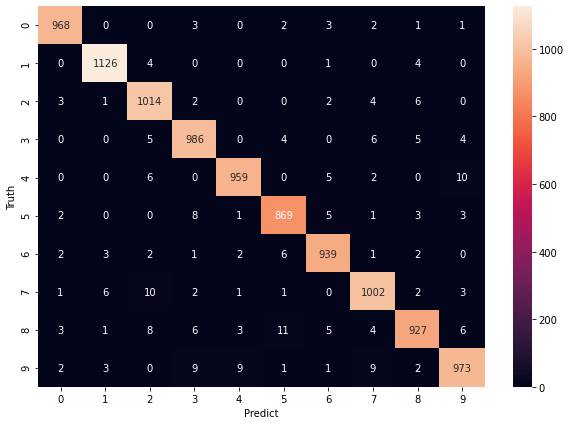

In [42]:
model.evaluate(x_test_flatted,y_test)
y_predict=model.predict(x_test_flatted)
y_predict_labels=[np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predict")
plt.ylabel("Truth")